In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def pulse_generator(Vpeak,tini,tr,tf,ton,tgap,toff,tend,dt,pulse_count=1,show=False):
  on_pulse = np.concatenate((np.zeros(int(tini/dt)), \
                            np.linspace(0, Vpeak, int(tr/dt)), \
                            Vpeak*np.ones(int(ton/dt)), \
                            np.linspace(Vpeak,0,int(tf/dt))), axis = None)
  off_pulse = np.concatenate((np.zeros(int(tgap/dt)), \
                            np.linspace(0, -Vpeak, int(tf/dt)), \
                            -Vpeak*np.ones(int(ton/dt)), \
                            np.linspace(-Vpeak,0,int(tr/dt))), axis = None)
  if toff > 0:
    V_pulse = np.tile(np.concatenate((on_pulse, off_pulse, np.zeros(int(tend/dt))), axis = None), pulse_count)
  else:
    V_pulse = np.tile(np.concatenate((on_pulse, np.zeros(int(tend/dt))), axis = None), pulse_count)

  t = np.arange(0,len(V_pulse)*dt,dt)
  if show:
    plt.plot(t, V_pulse)
    plt.xlabel(r"Time(s) $\rightarrow$")
    plt.ylabel(r"Voltage(V) $\rightarrow$")
    plt.title("Voltage Pulse")
    plt.grid()
    plt.show()

  return t, V_pulse

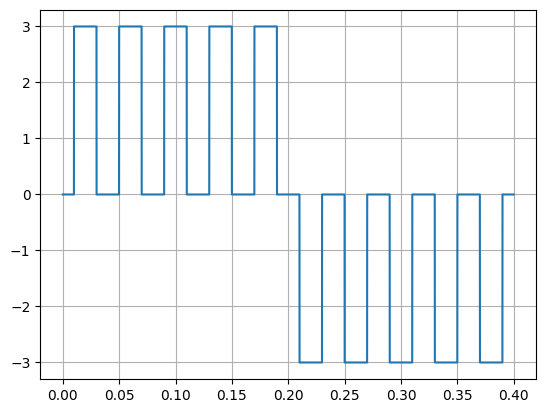

In [ ]:
# Generating the voltage pulsetrain
tini = 0.01
tr = 0
tf = 0
ton = 0.02
toff = 0
tgap = 0
tend = 0.01
dt = 0.0001
pulse_count = 1
t1, V_pulse1 = pulse_generator(3,tini,tr,tf,ton,tgap,toff,tend,dt,pulse_count=pulse_count)
_, V_pulse2 = pulse_generator(1.2,tini,tr,tf,ton,tgap,toff,tend,dt,pulse_count=pulse_count)
_, V_pulse3 = pulse_generator(1.8,tini,tr,tf,ton,tgap,toff,tend,dt,pulse_count=pulse_count)
_, V_pulse4 = pulse_generator(2.4,tini,tr,tf,ton,tgap,toff,tend,dt,pulse_count=pulse_count)
_, V_pulse5 = pulse_generator(3.6,tini,tr,tf,ton,tgap,toff,tend,dt,pulse_count=pulse_count)

t = np.arange(0, len(t1)*dt*10, dt)
#V_pulse_vary = np.concatenate((V_pulse1, V_pulse2, V_pulse3, V_pulse4, V_pulse5, -V_pulse5, -V_pulse4, -V_pulse3, -V_pulse2, -V_pulse1), axis = None)
V_pulse1 = np.concatenate((V_pulse1, V_pulse1, V_pulse1, V_pulse1, V_pulse1), axis = None)
V_pulse2 = -V_pulse1
V_pulse = np.concatenate((V_pulse1, V_pulse2), axis = None)
plt.plot(t, V_pulse)
plt.grid()

In [ ]:
# Parameters [Vary Ea (1-1.4), V0 (0.2-0.8), gamma (16-25), Rth (1e6-1e7)]
k = 1.38e-23    # Boltzmann constant
q = 1.6e-19     # Electronic change
dt = 0.001      # Time step
ve0 = 7e7       # Attempt-to-escape frequency
I0 = 0.65e-4    # Model parameter in the Stanford current equation
Ea = 1.2 * q    # Activation energy of ionic hopping
g0 = 0.2e-9
a = 0.3e-10     # Hopping distance
V0 = 0.8
gamma = 22.5
Rth = 1e7
g_min = 0.5e-9  # Minimum gap
g_max = 3e-9    # Maximum gap
Icc = 10e-6     # Current compliance for the Set operation
L = 8e-9        # Dielectric thickness
T_amb = 300     # Ambient Temperature

<ipython-input-63-a70b266ccc1f>:21: RuntimeWarning: invalid value encountered in double_scalars
  G[i] = I[i]/V


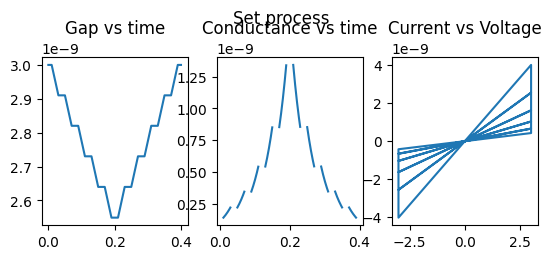

In [ ]:
# Variables with their initial values
T = np.zeros(len(t)-1)
I = np.zeros(len(t)-1)
g = np.zeros_like(t)
# Defining Conductance (G = I/V) array
G = np.zeros(len(t)-1)
g[0] = g_max
T[0] = T_amb
i = 0   # For indexing
# Updating Gap and Temperature values
for V in V_pulse[:-1]:
    I[i] = I0*np.exp(-g[i]/g0)*np.sinh(V/V0)
    if I[i] > Icc:
      I[i] = Icc
    T[i] = T_amb + V*I[i]*Rth
    g[i+1] = g[i] - dt*(ve0*np.exp(-Ea/(k*T[i]))*np.sinh(q*a*gamma*V/(L*k*T[i])))
    if g[i+1] > g_max:
        g[i+1] = g_max
    if g[i+1] < g_min:
        g[i+1] = g_min
    G[i] = I[i]/V
    i += 1

plt.subplot(2, 3, 1)
plt.plot(t, g)
plt.title("Gap vs time")

plt.subplot(2, 3, 2)
plt.plot(t[:-1], G)
plt.title("Conductance vs time")

'''
plt.subplot(2, 3, 2)
plt.plot(vol[:-1], T2)
plt.title("Temp vs Voltage")
'''

plt.subplot(2, 3, 3)
plt.plot(V_pulse[:-1], I)
plt.title("Current vs Voltage")

plt.suptitle("Set process")
plt.show()